## 3. Trabajo práctico

Elegir otro problema de clasificación a partir de los datasets disponibles <a href="https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table">aquí</a>, utilizar un algoritmo kNN para resolver el problema, evaluando el modelo obtenido con una matriz de confusión.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  

### Cargar Dataset

In [2]:
wine = load_wine()

### Separar Datos para entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.20)
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Entrenar modelo de clasificación con 10 vecinos

In [4]:
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

### Predecir datos de prueba

In [5]:
y_pred = classifier.predict(X_test)  

### Mostrar matriz de confusion  y reporte de clasificación

In [7]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[11  0  0]
 [ 1 12  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        11
          1       1.00      0.86      0.92        14
          2       0.92      1.00      0.96        11

avg / total       0.95      0.94      0.94        36



### Calcular el error producido considerando n vecinos para cada modelo de entrenamiento

In [8]:
error = []
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

### Graficar el error producido en los distintos modelos

Text(0,0.5,'Mean Error')

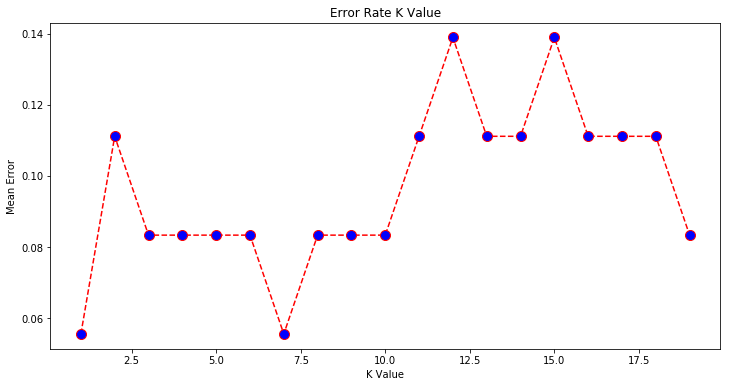

In [9]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

**Matriz de Confusión**

In [10]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[11  0  0]
 [ 1 12  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        11
          1       1.00      0.86      0.92        14
          2       0.92      1.00      0.96        11

avg / total       0.95      0.94      0.94        36

